In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r"C:\Users\Daniel\Documents\Feature Engineering\KASI")

In [3]:
os.getcwd()

'C:\\Users\\Daniel\\Documents\\Feature Engineering\\KASI'

In [4]:
df=pd.read_excel("kasi.xlsx")
df.head()

,Timestamp,Has it become more difficult or easier to find a job in your city?,"Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months?",How do you expect your (household’s) income to change over the next 6 months?,Gender,Age,What's your highest level of education?,Occupation,Please select your country to continue,What's your highest level of education? .1,...,Which one of the below banks do you use the most?.2,How would you rate your overall satisfaction with your bank?,"Thinking back over the past year, tell us about something that happened that made you particularly happy with your bank.","Thinking back over the past year, tell us about something that happened that made you particularly unhappy with your bank.","During the past year, did you recommend your bank to anyone? \t \t",How do you usually find out about new products at the bank,How likely would you recommend your bank to friends/family?,"The below images show a bank website and offering, choose the interface that is easiest to use",Tell us the reasons behind your choice,What will make you stay with your bank for the next 2 years ?
0,2019-10-20 09:46:09.993,Same,Less,Improve,Female,30-34,Master's degree,Salaried employee,Cameroon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-20 09:56:32.419,Same,Same,Stay the same,Male,25-29,Bachelor’s degree,Commission-based employee,Nigeria,NaN,...,NaN,4.0,Response time to my transaction,Unresolved issues with payment,Yes,"Emails, Social media",8.0,Image 2,It's more user interactive,My bank is genuinely interested in my financia...
2,2019-10-20 23:56:41.617,Same,Same,Stay the same,Male,45-54,Trade,Business owner,South Africa,vocational training,...,NaN,4.0,Nothing,Nothing,"No, but I didn’t have an opportunity","TV, SMS",7.0,Image 2,It's short,My bank is genuinely interested in my financia...
3,2019-10-21 03:21:10.459,Difficult,Less,Worsen,Female,25-29,No formal schooling,Salaried employee,Tanzania,NaN,...,I don't have a bank account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-21 03:19:32.931,Difficult,Less,Worsen,Male,25-29,No formal schooling,Salaried employee,Tanzania,NaN,...,I don't have a bank account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(3263, 24)

In [6]:
x=df.describe()
x

,How would you rate your overall satisfaction with your bank?,How likely would you recommend your bank to friends/family?
count,1889.000000,1889.000000
mean,3.615140,6.617787
std,0.829542,1.924976
min,1.000000,0.000000
25%,3.000000,6.000000
50%,4.000000,7.000000
75%,4.000000,8.000000
max,5.000000,10.000000


The summary statistics above we note the existance of null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 24 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                            --------------  -----         
 0   Timestamp                                                                                                                                                         3263 non-null   datetime64[ns]
 1   Has it become more difficult or easier to find a job in your city?                                                                                                3263 non-null   object        
 2   Compared to the last 6 months, are you able to spend more, the same or less money on large purch

A **heatmap** to show a visual representation of null values. The **yellow streaks** indicates the presence of null values 

C:\Users\Daniel\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

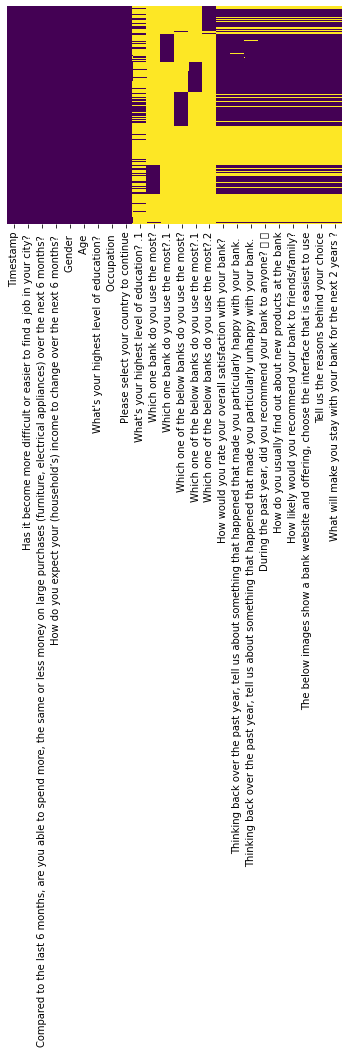

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The **yellow streaks** suggests missing values 

Let's impute the **null values**

In [9]:
df.dropna(axis=1,inplace=True)
df.to_excel("minnie_11.xlsx")

Let's eliminate all **leading** & **trailing** white space, but retain the space **inbetween** the text.

In [10]:
cols = df.select_dtypes(['object']).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())

Let's check if there's any **Repeated values**

In [11]:
df.duplicated().sum()

0

It's clear there are no yellow streaks indicating there's **no more missing values**

<AxesSubplot:>

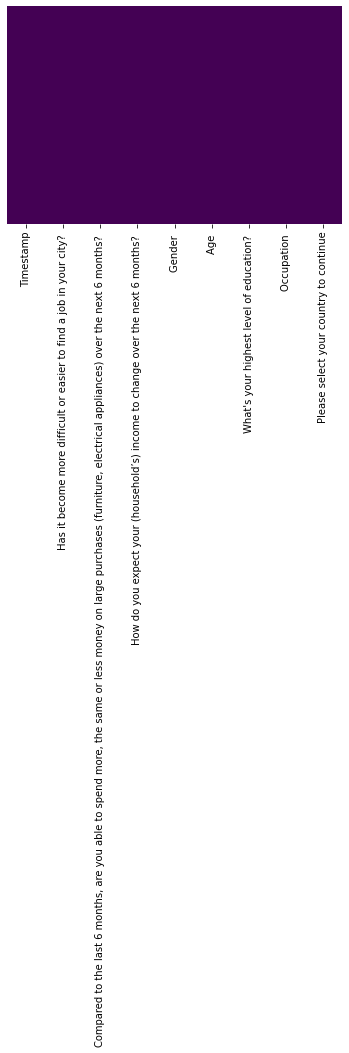

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It's clear the **null values** are no longer there

In [13]:
df.columns

Index(['Timestamp',
       'Has it become more difficult or easier to find a job in your city? ',
       'Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? ',
       'How do you expect your (household’s) income to change over the next 6 months? ',
       'Gender ', 'Age ', 'What's your highest level of education? ',
       'Occupation ', 'Please select your country to continue'],
      dtype='object')

There appears to be **trailing white spaces** in the **column names**.

Let's eliminate them

In [14]:
df.columns=df.columns.str.replace(' ','')

In [15]:
df.columns

Index(['Timestamp', 'Hasitbecomemoredifficultoreasiertofindajobinyourcity?',
       'Comparedtothelast6months,areyouabletospendmore,thesameorlessmoneyonlargepurchases(furniture,electricalappliances)overthenext6months?',
       'Howdoyouexpectyour(household’s)incometochangeoverthenext6months?',
       'Gender', 'Age', 'What'syourhighestlevelofeducation?', 'Occupation',
       'Pleaseselectyourcountrytocontinue'],
      dtype='object')

In [16]:
df['Age'].unique()

array(['30-34', '25-29', '45-54', '35-39', '18-24', '55-64',
       'less than 17 years', '40-44', '65+'], dtype=object)

In [17]:
df.iloc[:,6].unique()

array(["Master's degree", 'Bachelor’s degree', 'Trade',
       'No formal schooling', 'High school diploma', 'Currently studying',
       'Doctorate degree', 'High school, no diploma',
       'Professional Qualification e.g. CIMA'], dtype=object)

In [18]:
df.iloc[:,3].unique()

array(['Improve', 'Stay the same', 'Worsen'], dtype=object)

# Pivot Table

In [25]:
table_1 = pd.pivot_table(df, values='Age', index=[df.iloc[:,8],'Gender'],
                    columns=df.iloc[:,2],aggfunc=np.sum)
table_1

Comparedtothelast6months,areyouabletospendmore,thesameorlessmoneyonlargepurchases(furniture,electricalappliances)overthenext6months?                                               Less  \
Pleaseselectyourcountrytocontinue Gender                                                                                                                                                  
Cameroon                          Female                                                                                              30-3435-3925-2940-4440-4440-4435-3930-3430-341...   
                                  Male                                                                                                40-4440-4435-3940-4440-4430-3430-3435-3930-343...   
Cote d'Ivoire                     Female                                                                                                  18-2418-2418-2435-3930-3430-3430-3425-2918-24   
                                  Male                                                                                                30-3440-4435-3935-3945-5430-3430-3418-2430-342...   
Ghana                             Female                                                                                              less than 17 years25-2918-2440-4445-5435-3940-...   
                                  Male                                                                                                25-2940-4435-3945-54less than 17 years18-2440-...   
Kenya                             Female                                                                                              18-2425-2925-2918-2418-2418-2430-3425-2918-241...   
                                  Male                                                                                                30-3430-3430-3430-3430-3435-3935-3935-3930-342...   
Nigeria                           Female                                                                                              35-3930-3425-2930-3425-2930-3430-3430-3430-342...   
                                  Male                                                                                                25-2930-3430-3430-3435-3935-3930-3445-5435-394...   
South Africa                      Female                                                                                              30-3430-3435-3935-39less than 17 years30-3430-...   
                                  Male                                                                                                40-4430-3425-2925-2930-3425-2925-2930-3430-342...   
Tanzania                          Female                                                                                              25-2935-3925-2930-3425-2925-2930-3425-2918-242...   
                                  Male                                                                                                25-2930-3435-3918-2418-2425-2930-3425-2925-292...   

Comparedtothelast6months,areyouabletospendmore,thesameorlessmoneyonlargepurchases(furniture,electricalappliances)overthenext6months?                                               More  \
Pleaseselectyourcountrytocontinue Gender                                                                                                                                                  
Cameroon                          Female                                                                                              30-3435-3940-4430-3430-3430-3455-6445-5430-344...   
                                  Male                                                                                                35-3930-3440-4430-3430-3430-3440-4430-3440-444...   
Cote d'Ivoire                     Female                                                                                              18-2435-3918-2425-2925-2925-2940-4425-2925-292...   
                                  Male                                  

In [20]:
df.iloc[:,8].unique()

array(['Cameroon', 'Nigeria', 'South Africa', 'Tanzania', "Cote d'Ivoire",
       'Kenya', 'Ghana'], dtype=object)

# A function for categorical features only

In [21]:
cat_cols=[col for col in df.columns if (df[col].dtypes=='O')]
cat_cols

['Hasitbecomemoredifficultoreasiertofindajobinyourcity?',
 'Comparedtothelast6months,areyouabletospendmore,thesameorlessmoneyonlargepurchases(furniture,electricalappliances)overthenext6months?',
 'Howdoyouexpectyour(household’s)incometochangeoverthenext6months?',
 'Gender',
 'Age',
 "What'syourhighestlevelofeducation?",
 'Occupation',
 'Pleaseselectyourcountrytocontinue']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
pp_cat=Pipeline([
    ('ohe_cat',OneHotEncoder(sparse=False,handle_unknown='ignore')) #setting "sparse=False" means OneHoteEncoder will return an array, but not a sparse matrix
])

In [23]:
ct=ColumnTransformer([ 
    ('pp_cat',pp_cat,cat_cols)
])

In [24]:
xt=ct.fit_transform(df)